     ┌───┐┌──────┐┌────────┐┌───────┐
q_0: ┤ X ├┤0     ├┤ P(π/8) ├┤0      ├
     └───┘│      │├────────┤│       │
q_1: ─────┤1     ├┤ P(π/4) ├┤1      ├
          │  QFT │├────────┤│  IQFT │
q_2: ─────┤2     ├┤ P(π/2) ├┤2      ├
          │      │└┬──────┬┘│       │
q_3: ─────┤3     ├─┤ P(π) ├─┤3      ├
          └──────┘ └──────┘ └───────┘
c: 4/════════════════════════════════
                                     


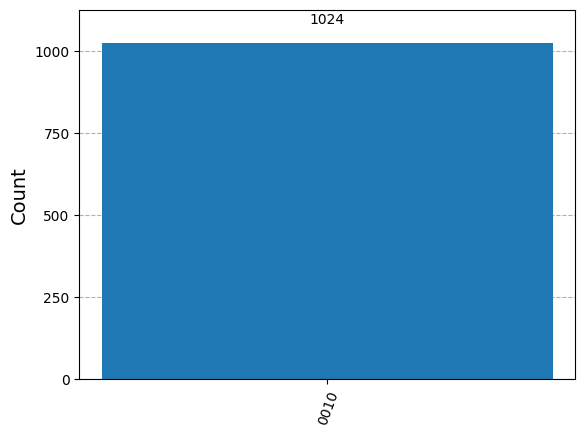

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import numpy as np
import matplotlib.pyplot as plt



# Create a Quantum Circuit with 4 qubits
qc = QuantumCircuit(4, 4)

# Step 1: Initialize the input to |0001>
qc.x(0)  

# Step 2: Apply Quantum Fourier Transform (QFT)
qft = QFT(4)
qc.append(qft, range(4))

# Step 3: Apply phase shifts to increment by 1
qc.p(np.pi / 8, 0)
qc.p(np.pi / 4, 1)
qc.p(np.pi / 2, 2)
qc.p(np.pi, 3)

# Step 4: Apply the inverse Quantum Fourier Transform (iQFT)
qc.append(qft.inverse(), range(4))

# Step 5: Draw Circuit
print(qc.draw())

# Step 5: Measure the qubits
qc.measure(range(4), range(4))

# Step 6: Simulate with Aer simulator and get results
aer_sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_qc).result()
answer = results.get_counts()
plot_histogram(answer)
